# Data Science I Topic 3.1 Descriptive Statistics

## Non-programming Exercise

<u>In this non-programming/ "pen and paper" exercise, feel free to answer the questions/ perform the calculations on a piece of paper, use your calculator, or use the code cells like you'd use your calculator during the exam (i.e. standard arithmetic calculations up to whatever your scientific calculators can do). </u>

**Q1:** <u>Briefly (1-2 sentences), explain the differences of:</u>

1. Population vs. Sample

2. Parameter vs. Statistic

3. Variable vs. Constant

4. Qualitative vs. Quantitative Variables

**Q2:** Given the following data of the lifetime (in hours) of 12 transistors:<br>
113, 121, 140, 106, 132, 134, 118, 117, 108, 122, 127, 138

1. Find the sample mean, median, variance, and standard deviation.
2. Assuming the lifetime of transistors follows a normal distribution, calculate the standard scores of the data points: 106, 117, 132, and 140.
3. We want to transform this dataset such that the mean is now 100 with standard deviation of 10. Find the new transformed dataset.

**Q3**: <u>Describe the relationship of mean and median in:</u>
* Normal distribution
* Positively skewed distribution
* Negatively skewed distribution


**Q4**: Calculate the Pearson correlation coefficients between the numbers of **Gold** and **Total** medals achieved in the 2016 Olympic by the 12 countries shown below.

<img src="medal.png" width="500">
(source:Wiki)

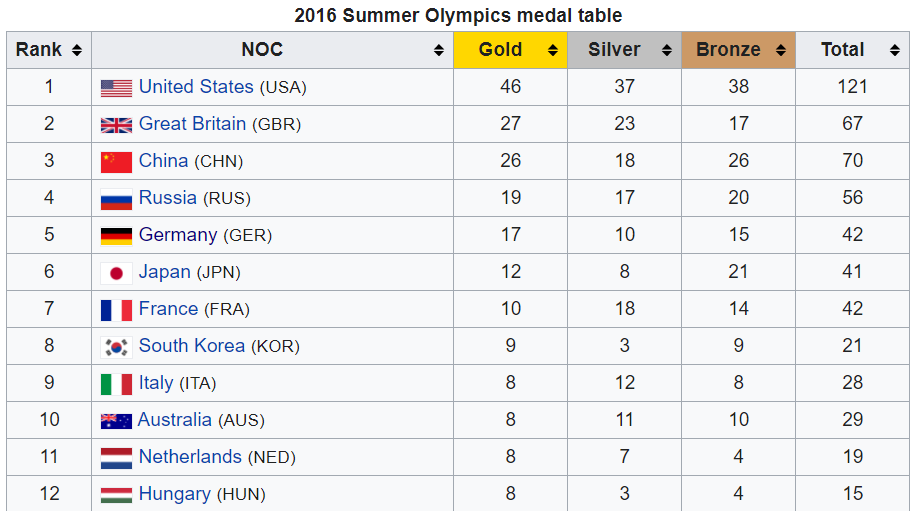

In [2]:
# when editing with colab, the "<img src..." doesn't work, so you can do this instead:
# from IPython.display import Image
# drive.mount('/content/drive')
from IPython.display import Image
Image("/content/drive/MyDrive/DS1/DS1_Tutorial_SoSe24/T3/medal.png")

## Programming Exercise

<u>Descriptive statistics is concerned with the description and summarization of data. We need to present data in a meaningful way. We've seen before in T2 how to extract summary statistics and visual information from a data frame. In this tutorial we'll practise what we know from EDA and see more data description techniques.</u>

In [16]:
# Run this cell
from pydataset import data
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

For this tutorial, we are going to use the `birthwt` data set from `pydataset`. Follow the instructions below.

In [3]:
# Run this cell to show the dataset documentation
birthwt = data('birthwt', show_doc=True)

birthwt

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Risk Factors Associated with Low Infant Birth Weight

### Description

The `birthwt` data frame has 189 rows and 10 columns. The data were collected
at Baystate Medical Center, Springfield, Mass during 1986.

### Usage

    birthwt

### Format

This data frame contains the following columns:

`low`

indicator of birth weight less than 2.5 kg.

`age`

mother's age in years.

`lwt`

mother's weight in pounds at last menstrual period.

`race`

mother's race (`1` = white, `2` = black, `3` = other).

`smoke`

smoking status during pregnancy.

`ptl`

number of previous premature labours.

`ht`

history of hypertension.

`ui`

presence of uterine irritability.

`ftv`

number of physician visits during the first trimester.

`bwt`

birth weight in grams.

### Source

Hosmer, D.W. and Lemeshow, S. (1989) _Applied Logistic Regression._ New York:
Wiley

### References

Venables, W. N. and Ripley, 

In [4]:
# Run this cell to display the first 5 entries of birthwt
birthwt = data('birthwt')
print(birthwt.head())

    low  age  lwt  race  smoke  ptl  ht  ui  ftv   bwt
85    0   19  182     2      0    0   0   1    0  2523
86    0   33  155     3      0    0   0   0    3  2551
87    0   20  105     1      1    0   0   0    1  2557
88    0   21  108     1      1    0   0   1    2  2594
89    0   18  107     1      1    0   0   1    0  2600


In [6]:
titanic_data = data('titanic')

In [9]:
titanic_data.columns

Index(['class', 'age', 'sex', 'survived'], dtype='object')

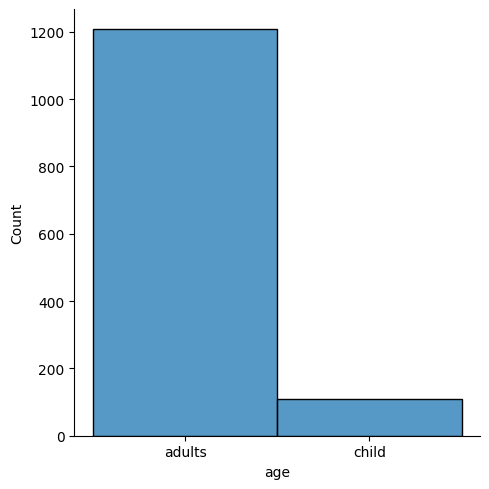

In [12]:
sns.displot(titanic_data.age, bins=20)

In [19]:
titanic_data.survived

1       yes
2       yes
3       yes
4       yes
5       yes
6       yes
7       yes
8       yes
9       yes
10      yes
11      yes
12      yes
13      yes
14      yes
15      yes
16      yes
17      yes
18      yes
19      yes
20      yes
21      yes
22      yes
23      yes
24      yes
25      yes
26      yes
27      yes
28      yes
29      yes
30      yes
31      yes
32      yes
33      yes
34      yes
35      yes
36      yes
37      yes
38      yes
39      yes
40      yes
41      yes
42      yes
43      yes
44      yes
45      yes
46      yes
47      yes
48      yes
49      yes
50      yes
51      yes
52      yes
53      yes
54      yes
55      yes
56      yes
57      yes
58       no
59       no
60       no
61       no
62       no
63       no
64       no
65       no
66       no
67       no
68       no
69       no
70       no
71       no
72       no
73       no
74       no
75       no
76       no
77       no
78       no
79       no
80       no
81       no
82       no
83       no
84  

In [20]:
# Optional: To see all available data from pydataset, run this cell.
pd.set_option("display.max_rows", None, "display.max_columns", None)
data()


,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [ ]:
# If you run the cell directly above, also run this cell to reset the option
pd.reset_option('all', silent=True) # because of the set_option above

***

### Describing data set

#### Reading a stem and leaf graph

<u>Run the following cell and answer the questions.</u>

In [ ]:
import stemgraphic # may need to install first: pip install stemgraphic
stemgraphic.stem_graphic(birthwt.bwt)
plt.show()

<u>Note that the leaves are rounded off to the nearest tens (see the Key). Compare to the following list.</u>

In [ ]:
# Run this cell to see the sorted values of all birth weights.
print(birthwt.bwt.sort_values().to_list())

<u>From the graph and rounded off to nearest tens of grams,</u>
1. What's the median weight?
2. How many babies were born with 3.2 kg birth weight?
3. How many babies were born with more than 4 kg? less than 1.5 kg?

**Ans:**






1.
2.
3.

***

#### Frequency tables using `pandas.crosstab()`

<u>Run the following cell and answer the questions.</u>

In [ ]:
# Recall low=1 when birth weight is <2.5kg (see the dataset description)
pd.crosstab(index=birthwt.age, # set index based on birthwt.age
            columns=[birthwt.low], # values to group by in the columns
            margins=True) # Add marginal value (row sums)

1. What is the ratio of babies born with low birth weight?
2. Among women younger than 18, what is the ratio of babies born with low birth weight?

**Ans:**

<u>We can also set multiple column levels to group the values.</u>

In [ ]:
# Try it: complete the following to get multiple column levels
pd.crosstab(__________, #set index based on the race
            columns=[birthwt.smoke, birthwt.low], # tabulate based on two column levels
            __________) # display row sums

* Among smokers, what's the ratio of babies with low birth weight?
* Among non-smokers, what's the ratio of babies with low birth weight?

**Ans:**

#### Class Intervals

<u>We can group several actual scores into an interval of scores. It is suitable for a large dataset.</u>

In [ ]:
# Run this cell
import numpy as np
bins = np.arange(1,6)*1000 #[1000,...,5000]

# add a new column to contain the interval groups
birthwt["wtint"] = np.digitize(birthwt.bwt.to_list(),
                               bins,
                               right=True) # right-inclusive
birthwt.head()

Interval groups:
* 0: 0 < birth weight $\leq$ 1000
* 1: 1000 < birth weight $\leq$ 2000
* 2: 2000 < birth weight $\leq$ 3000
* 3: 3000 < birth weight $\leq$ 4000
* 4: 4000 < birth weight $\leq$ 5000

<u>Using `.groupby()` then `.count()`, display the count per interval.</u>

In [ ]:
#Ans:


<u>Using `.groupby()` and `.agg()`, display the mean, median, and count of the birth weights (`bwt`) per interval group.</u>

In [ ]:
#Ans:


#### Graphs

<u>Display the histograms of birthweights to smokers/non-smokers in one plot.</u>

In [ ]:
#Ans:


<u>You can get a normalized distribution plot by using `sns.displot`. Run the cell below and compare it to the histogram you've just created.</u>

In [ ]:
# Try removing the argument hist=False to both distplot and see the difference

sns.distplot(birthwt.bwt[birthwt.smoke==0], bins=20, hist=False, color='b', label='non-smokers')
sns.distplot(birthwt.bwt[birthwt.smoke==1], bins=20, hist=False, color='r', label='smokers')

plt.show()

### Summarizing data set

#### Percentile and Percentile Rank

<u>How do you interpret percentile, quantile, and percentile rank? Run the following cells. What do the numbers show?</u>

In [ ]:
# with scipy.stats
from scipy import stats

stats.scoreatpercentile(birthwt.bwt,25)

In [ ]:
# with numpy
np.percentile(birthwt.bwt,25)

In [ ]:
# with pandas
birthwt.bwt.quantile(0.25)

**Ans:**




<u>What is the percentile rank of birth weight 2500 grams? How do you interprete this number?</u>

In [ ]:
# Complete this
stats.percentileofscore(birthwt.bwt, _______)

**Ans:**




#### Measure of Central Tendency

<u>Using `.groupby()` and `.agg()`, display the mean and median from :</u>
* each weight interval
* each race group
* smokers/ non-smokers

In [ ]:
#Ans:


#### Box plots

In [ ]:
# run this cell
sns.boxplot(y='bwt', data=birthwt)
plt.yticks(range(500,5001,500))
plt.grid(True)
plt.show()

##### Inter-quartile range

<u>From the boxplot, estimate:</u>
* Min and max weights?
* First quartile, Q1?
* Third quartile, Q3?
* Inter-quartile range, IQR?

Compare your answers to the numbers obtained by using `pandas`/ `numpy`/ `stats`.

In [ ]:
#Ans:


In [ ]:
# programmatically
print('min:', ___________,'max:', ____________)

Q1 = _____________________
print(Q1)

Q3 = _____________________
print(Q3)

IQR = ____________________
print(IQR)

##### Outliers identification

<u>Define RUB (reasonable upper boundary) to be RUB=Q3+1.5\*IQR and RLB to be RLB=Q1-1.5\*IQR.<br>
Find the outliers, which fall either below the RLB or above the RUB.</u>

**Ans:**

In [ ]:
RUB = __________
RLB = __________

birthwt.bwt[____________________]

#### Measure of variation

##### Range

<u>The range of a set of data is the difference between the highest and lowest values in the set.
<br>
Display the range of the birth weights for:</u>
* the whole set
* grouped by smokers/ non-smokers

**Ans:**

In [ ]:
# range of birthweight of the whole set
print('range = ', __________, 'grams')

In [ ]:
# range of birthweight, grouped
print('grouped range:')
birthwt.__________

##### Deviation score

<u>The deviation score is the difference between given score and the mean, $$x_{i}=\left(X_{i}-\bar{X}\right)$$</u>

<u>Add a new column, `devscore`, that contains the deviation scores of birth weights, to `birthwt` DataFrame.</u>

**Ans:**

In [ ]:
birthwt["devscore"] = ______________________________
birthwt.head(3)

##### Mean absolute deviation

The average of the absolute values of the deviation scores, $$\text{MAD}=\frac{\sum\left|X_{i}-\bar{X}\right|}{n}=\frac{\sum x_{i}}{n}$$

**Ans:**

In [ ]:
print('Mean deviation =', __________)

##### Variance and standard deviation

<u>Display the variance and standard deviation of the birth weights per weight interval `wtint`.</u>

In [ ]:
#Ans:


#### Measure of Symmetry

##### Skewness

<u>Skewness is a measure of (the lack of) symmetry. You can use `.skew()` on pandas series.</u>
* less than -1 or greater than +1: highly skewed.
* between -1 and -0.5 or between +0.5 and +1: moderately skewed.
* between -0.5 and 0.5: approximately symmetric.
<br>
<br>
<u>Display the skewness of the whole birthweights. What can you conclude?</u>

In [ ]:
#Ans:


**Ans:**

##### Kurtosis

<u>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.</u>
* excess kurtosis of a normal distribution: exactly 0
* excess kurtosis<0 : platykurtic (shorter and thinner tails, central peak is lower and broader)
* excess kurtosis>0 : leptokurtic (longer and fatter tails, central peak is higher and sharper)
<br><br>
<u>Using `.kurt()`, display the (excess) kurtosis of the whole birthweights. What can you conclude?</u>

In [ ]:
#Ans:


**Ans:**

In [ ]:
# Run this cell
sns.distplot(birthwt.bwt, bins=20)
plt.show()

#### Standard scores

<u>A dataset is normal if its scores are clustered around its median (less data as you go farther from the median).<br>
Empirical rules: if the dataset is normal then</u>
* 68% of data lies within $\mu\pm s$
* 95% of data lies within $\mu\pm 2s$
* 99.7% of data lies within $\mu\pm 3s$
<br>
<u>When a dataset is normally distributed, we can find out the probability of a score occurring by standardising the scores.</u>

<u>Using `stats.percentileofscore()`, `.mean()`, and `.std`, check how many percents of the birth weights fall within $\mu\pm s$, $\mu\pm 2s$, and $\mu\pm 3s$. Close enough to approximate to normal distribution?</u>

**Ans:**

In [ ]:
mu = _______________
s = ________________

#check +/-s
#

In [ ]:
#check +/-2s
#

In [ ]:
#check +/-3s
#

##### Z-scores

<u>The Z-score, or standard score, is the number of standard deviations a given data point lies above or below mean, $$z=\frac{X-\bar{X}}{s},$$ where $s$ is the standard deviation.</u>

<u>Add a new column, `zscore`, to `birthwt` DataFrame.</u>
<br><br>
Hint: either use the formula and the familiar `.mean()` and `.std()` or find out how to use `stats.zscore()`.
<br><br>
Note that the default degree of freedom (d.o.f) for `stats.zscore` is $n$, while the standard deviation in `.std()` is based on d.o.f of $n-1$, so the numbers will be slightly different unless we set the d.o.f correction, ddof, to 1 (`ddof=1`).

In [ ]:
birthwt["zscore"] = _____________________________________

# Display a few entries
__________

#### Transformed standard scores

Say we want to transform our standardized score $z$ into a distribution with a new mean $\bar{X}^{\prime}$ and standard deviation $s^{\prime}$, the transformed score is given by $$X^{\prime}=\left(s^{\prime}\right)\left(z\right)+\bar{X}^{\prime}$$

<u>Add a new column `trfwt` to contain the transformed data with new mean of 3000 grams and standard deviation of 500 grams. Check the new mean, median, and standard deviation.</u>

**Ans:**

In [ ]:
birthwt["trfwt"] = __________________________

# display mean, median, std
#

### Bivariate Analysis

<u>Find the Pearson's r and Spearman's rho correlation coefficients between `age` and `bwt`</u>

In [ ]:
# Pearson's r
__________

# Spearman's rho
__________

<u>What can you conclude?</u>